<a href="https://colab.research.google.com/github/YuanSun/ML_6_Project/blob/main/Group_6_ML_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group 6 - Credit Card Fraud**

Group members:


*   Lily Karayeva
*   Oleksiy Kovtonyuk
*   Raghu Krishnakumar
*   Mandy Li
*   Sandar Min
*   Rickie Li




The data set is the Heart Failure Prediction dataset, available from: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/data

## **Data Analysis**

### Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

def check_data_balance(series, style="seaborn-pastel"):
  with plt.style.context(style):
    unique = series.value_counts()
    display(unique) #show unique value counts of the target
    plt.pie(unique, explode=[0.05]*len(unique), labels=unique.index, autopct='%1.1f%%'); #plot a pie chart for the target to see if data are balanced

In [ ]:
cc_df = pd.read_csv("creditcard_2023.csv")
cc_df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


### Data Exploration

In [ ]:
# Data size
print(f"Data set size: {cc_df.shape[0]} rows and {cc_df.shape[1]} columns")

Data set size: 568630 rows and 31 columns


In [ ]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
cc_df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [ ]:
# Checking duplicate rows
print(f"Total duplicate rows = {cc_df.duplicated().sum()}")

Total duplicate rows = 0


In [ ]:
# Eliminating 'id' column since there is no value in it
cc_df.drop("id", axis = 1, inplace = True)

So far, there are:
- No duplicates
- No null values
- No categorical data

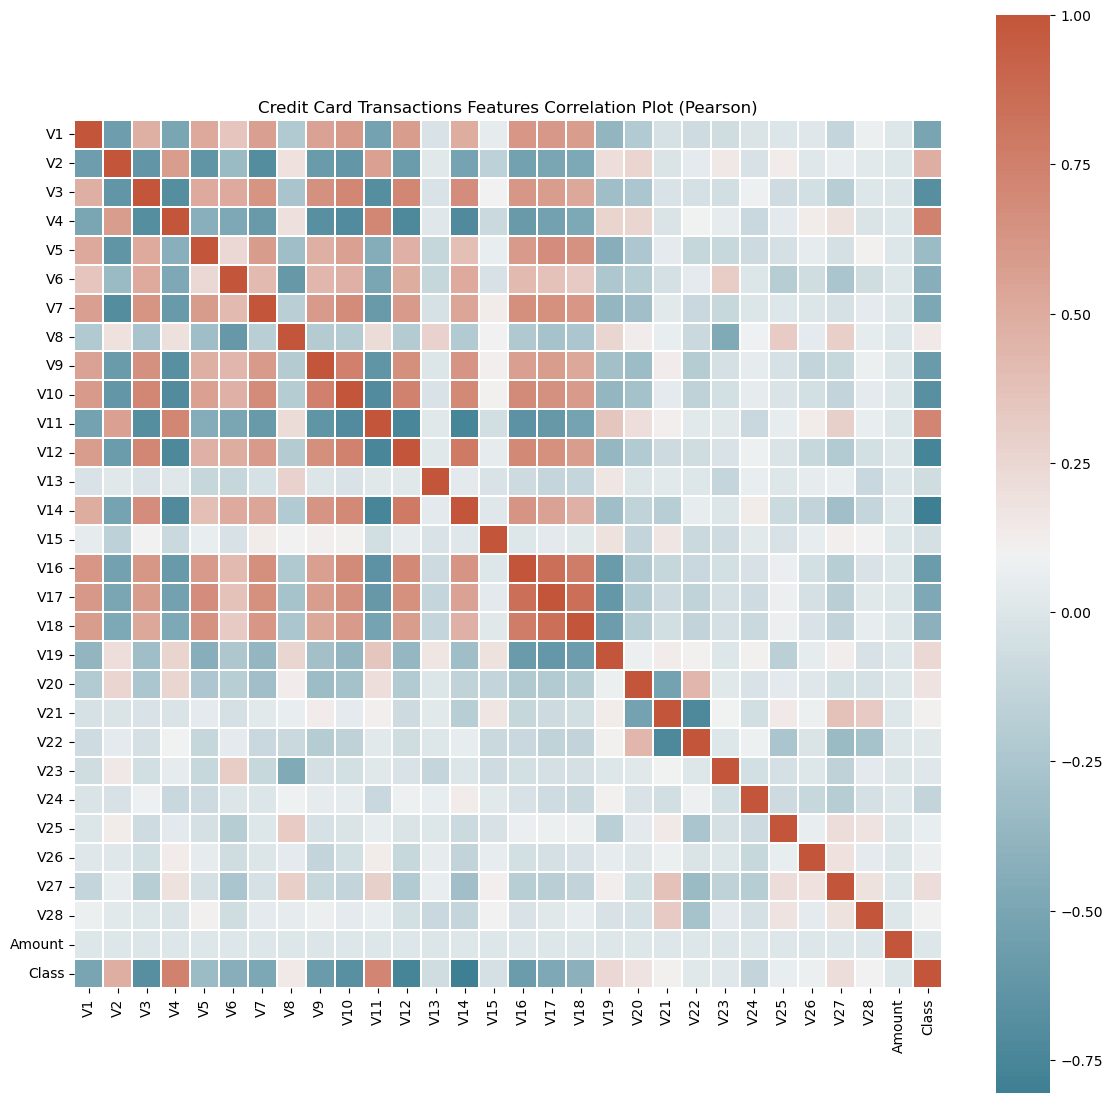

In [ ]:
# Set up the plot
plt.figure(figsize=(14, 14))
plt.title('Credit Card Transactions Features Correlation Plot (Pearson)')
corr = cc_df.corr()
cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.1, cmap=cmap, square=True)
plt.yticks(rotation=0)
plt.show()

In [ ]:
# Extract correlation values
corr_values = corr.unstack().sort_values(ascending=False)

# Filter out the correlation of each feature with itself and take absolute values
corr_values = corr_values[corr_values != 1]

# Print the top correlated pairs
corr_values.head(10)

V18  V17    0.851366
V17  V18    0.851366
     V16    0.848095
V16  V17    0.848095
V12  V14    0.783878
V14  V12    0.783878
V16  V18    0.767992
V18  V16    0.767992
V9   V10    0.748487
V10  V9     0.748487
dtype: float64

There are few strong positive correlations to be noted:
- The correlation coefficient between variables V18 and V17 is 0.851366 indicating to a strong positive correlation between these two variables. When one increases, the other tends to increase as well
- The correlation coefficient between variables V16 and V17 is also 0.848095, which is another strong positive correlation
- The correlation coefficient between variables V12 and V14 is 0.783878 which is not as strong as the previous ones, but it still suggests that when one variable increases, the other tends to increase as well

In [ ]:
# Print the top correlated pairs
corr_values.tail(10)

V21    V22     -0.734653
V22    V21     -0.734653
V11    V12     -0.744642
V12    V11     -0.744642
V14    V11     -0.762322
V11    V14     -0.762322
Class  V12     -0.768579
V12    Class   -0.768579
Class  V14     -0.805669
V14    Class   -0.805669
dtype: float64

There are few strong negative correlations to be noted:
- The correlation coefficient between variables V21 and V22 is -0.734653 which suggests that when one variable increases, the other tends to decrease
- The correlation coefficient between variables V11 and V12 is -0.744642 which is another negative correlation
- The correlation coefficient between variables V14 and V11 is -0.762322

Class
0    284315
1    284315
Name: count, dtype: int64

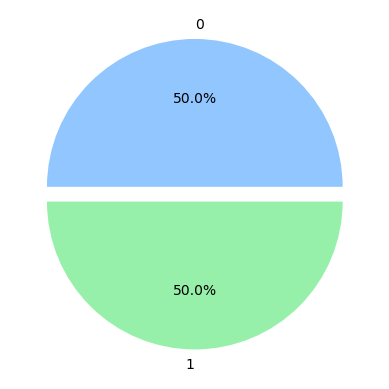

In [ ]:
#Checking data balance
check_data_balance(cc_df["Class"])

The data is balanced as it contains 50% of fraudulent and normal transactions.

In [ ]:
cc_df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [ ]:
fraud = cc_df[cc_df['Class']==1]
normal = cc_df[cc_df['Class']==0]
print(f'Shape of Fraud Transactions: {fraud.shape}')
print(f'Shape of Normal Transactions: {normal.shape}')

Shape of Fraud Transactions: (284315, 30)
Shape of Normal Transactions: (284315, 30)


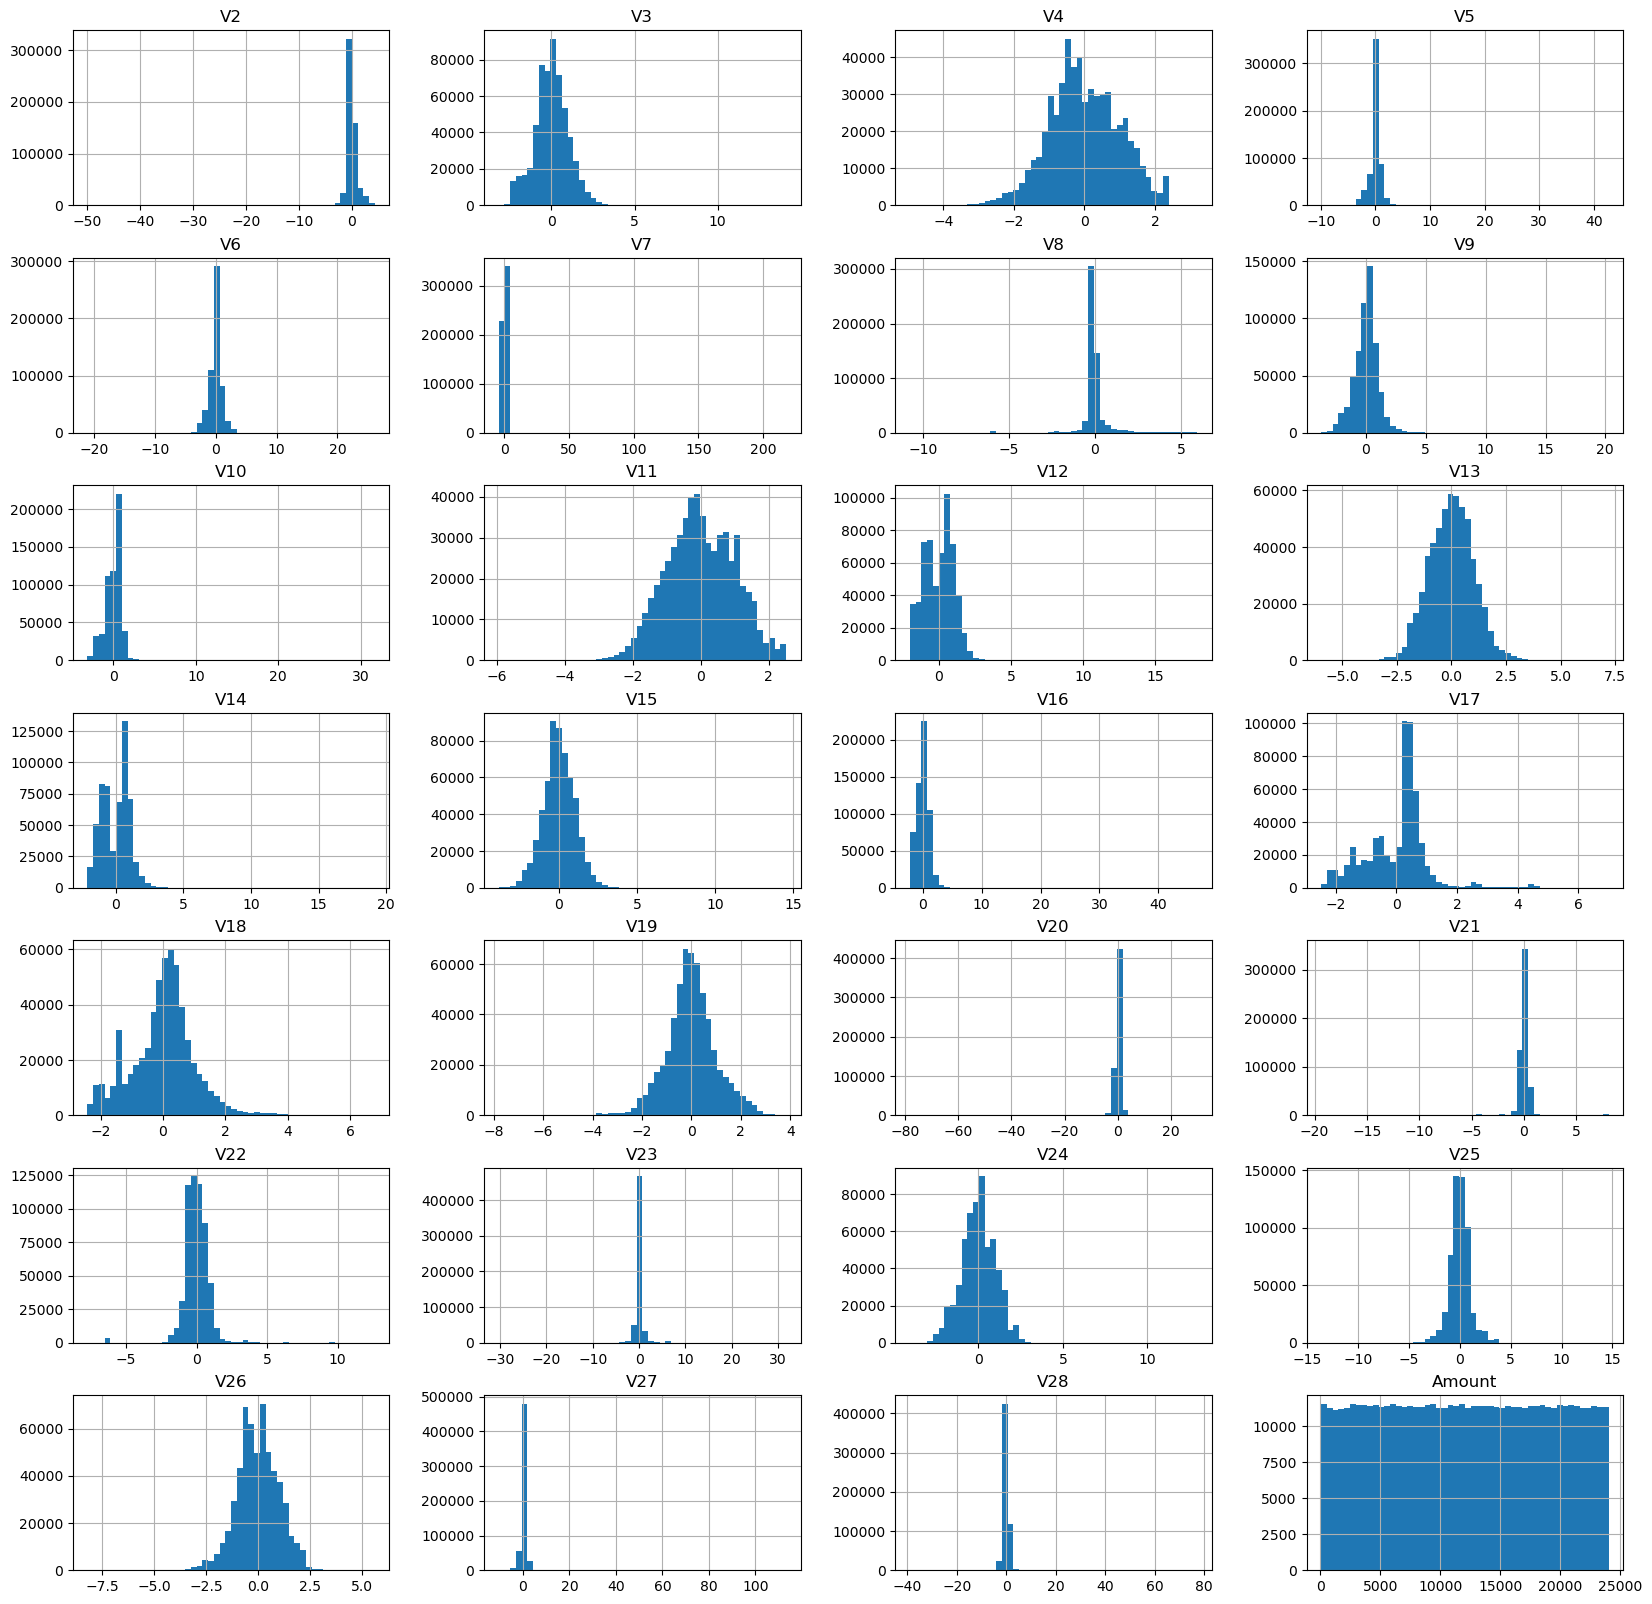

In [ ]:
# Distribution of numerical data

cc_df.iloc[:, 1:-1].hist(figsize=(20, 20), bins=50, layout=(7, 4))
plt.show()

V2 to V28:
- Most of these distributions are centered around zero, indicating that the data tends to cluster near the origin.
- Some histograms exhibit a unimodal shape, meaning they have a single peak.
Others have a multimodal shape, suggesting multiple peaks or clusters within the data.
- The tails of these distributions vary; some are symmetric, while others have long tails indicating the presence of outliers.

V8
- The histogram for V8 shows a right-skewed distribution meaning there are higher frequencies of lower values, and the tail extends toward larger positive values.

In [ ]:
pd.concat([fraud['Amount'].describe(), normal['Amount'].describe()], axis=1)

,Amount,Amount
count,284315.000000,284315.000000
mean,12057.601763,12026.313506
std,6909.750891,6929.500715
min,50.010000,50.120000
25%,6074.640000,6034.540000
50%,12062.450000,11996.900000
75%,18033.780000,18040.265000
max,24039.930000,24039.930000


In [ ]:
fraud['Amount'].value_counts().sort_values(ascending=True)

Amount
20938.08    1
10209.96    1
19534.30    1
15496.64    1
17718.87    1
           ..
16472.35    4
15499.36    4
8268.68     4
2843.75     4
70.64       4
Name: count, Length: 268227, dtype: int64

With fraud transactions, the average amount of fraud is 12057.60 USD, the highest is 24039.93 USD, the lowest is 50.01 USD. Some fraudulent amounts seem to repeat max 4 times

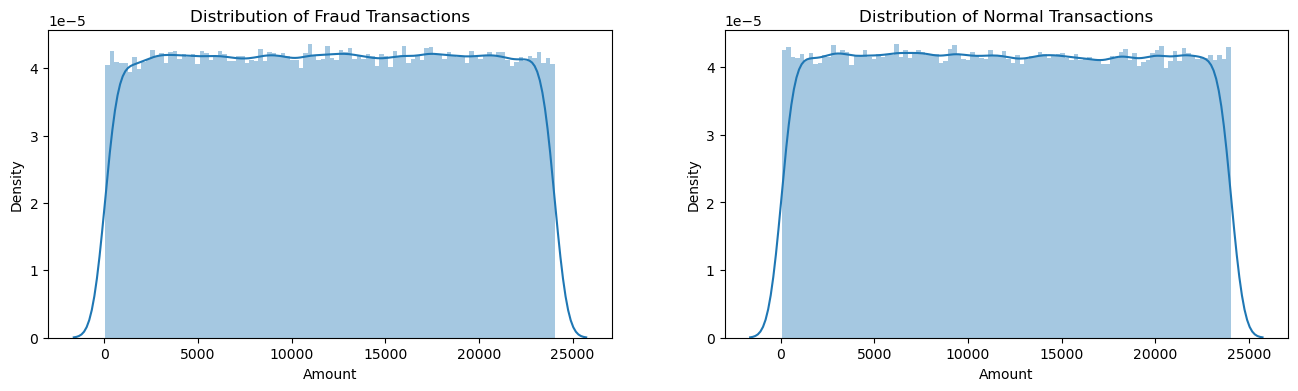

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(fraud['Amount'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(normal['Amount'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of Normal Transactions")

plt.show()

Both fraud and normal transactions exhibit similar patterns in terms of transaction amounts, with most transactions occurring at lower values. However, the normal distribution appears slightly smoother than the fraud distribution.

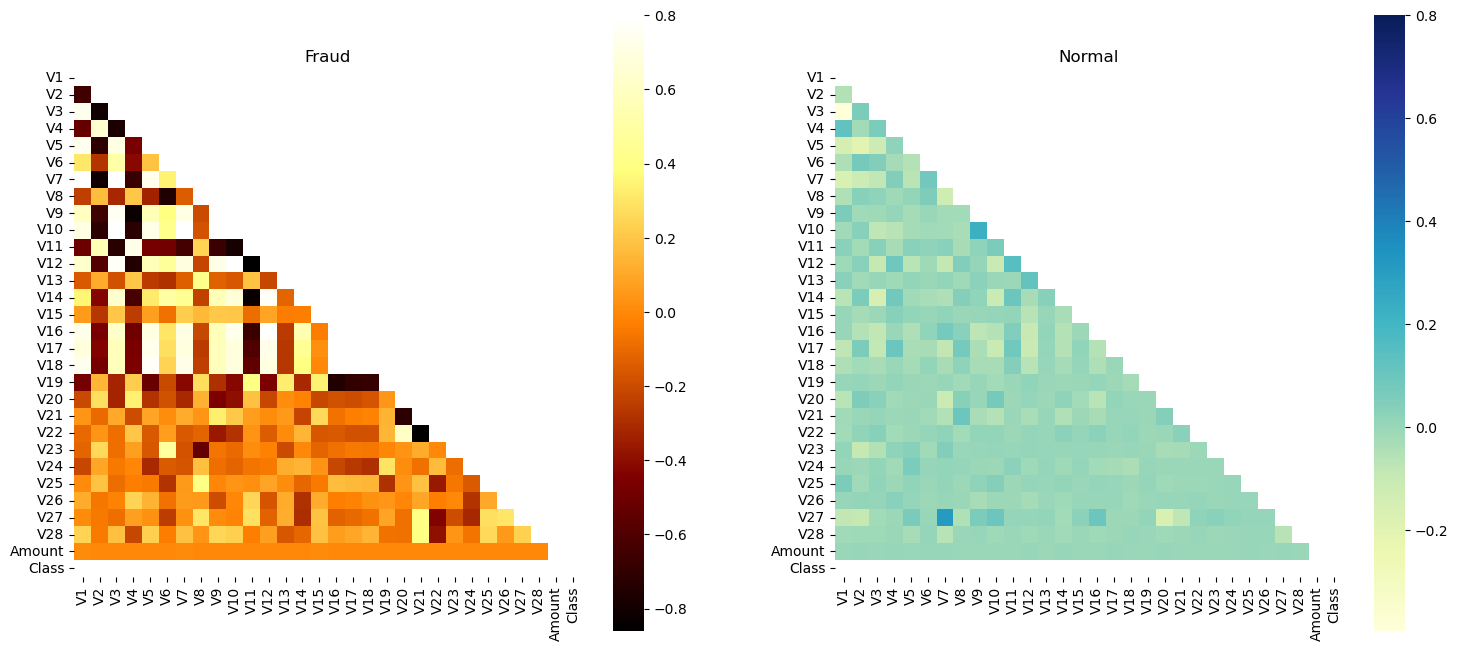

In [ ]:
# Correlation matrix
f, (ax1, ax2) = plt.subplots(1,2,figsize =( 18, 8))
corr = cc_df.corr()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
sns.heatmap((cc_df.loc[cc_df['Class'] ==1]).corr(), vmax = .8, square=True, ax = ax1, cmap = 'afmhot', mask=mask);
ax1.set_title('Fraud')
sns.heatmap((cc_df.loc[cc_df['Class'] ==0]).corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu', mask=mask);
ax2.set_title('Normal')
plt.show()

The image visually compares the correlation patterns between variables in fraudulent and normal transactions. The Fraud heatmap exhibits more intense correlations, while the Normal heatmap shows milder associations.

# I. Random Forest Model

In [ ]:
cc_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


## Data pre-processing

### all variables are continuous except target ('Class') which is binary. Some variables have negative values.

In [ ]:
## Splitting data into predictors and target variable
TARGET = cc_df['Class']  # whether the transaction is fraudulent (1) or not (0)
columns_predictors = [col for col in cc_df.columns if col != 'Class']

X = cc_df[columns_predictors]
y = cc_df['Class']
display(X)
display(y)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83


0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64

## Train-Test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y) #stratified sampling based on the target
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (454904, 29)
X_test.shape: (113726, 29)
y_train.shape: (454904,)
y_test.shape: (113726,)


In [ ]:
#Transforming all numeric predictors with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train) #fit the scaler based on the scale of X_train, and then use the fitted scaler to transform both X_train and X_test (this is the correct way to use the scaler)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


print(f"X_train_scaled.shape: {X_train_scaled.shape}")
print(f"X_test_scaled.shape: {X_test_scaled.shape}")

X_train_scaled.shape: (454904, 29)
X_test_scaled.shape: (113726, 29)


## Random Forest Classifer

In [ ]:
## Finding the best hypermater for the list of n_estimators {4, 5, 10, 20, 50}
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

RF = RandomForestClassifier(random_state=123)

param_grid = [{'n_estimators':  [4, 5, 10, 20, 50]}]

rf_grid_search = GridSearchCV(RF, param_grid, cv=5 ,scoring='roc_auc')
rf_grid_search.fit(X_train_scaled, y_train)
rf_best_estimator = rf_grid_search.best_estimator_


In [ ]:
print(f"The best hyperparameter in the list for Random Forest is when",rf_grid_search.best_params_ )

In [ ]:
cvres_RF = rf_grid_search.cv_results_

for mean_score, params in zip(cvres_RF["mean_test_score"], cvres_RF["params"]):
    print(mean_score, params)

0.9999331398524163 {'n_estimators': 4}
0.9999474480146926 {'n_estimators': 5}
0.999972441089616 {'n_estimators': 10}
0.9999788429872737 {'n_estimators': 20}
0.9999892402749125 {'n_estimators': 50}


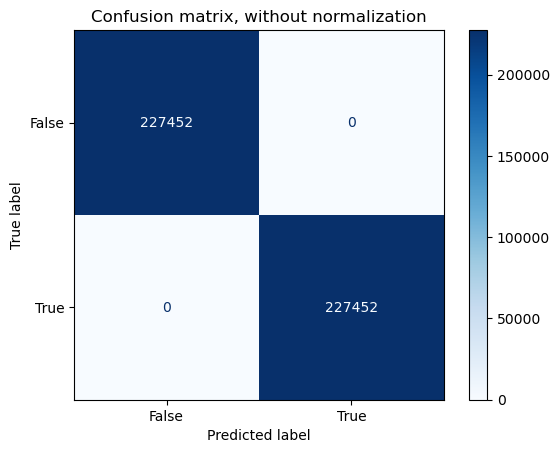

In [ ]:
#visualize classification results with confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
with plt.style.context("default"): #temporarily set the plot style
    disp = ConfusionMatrixDisplay.from_estimator(
        rf_best_estimator,
        X_train_scaled,
        y_train,
        display_labels=[False, True],
        cmap=plt.cm.Blues,
        normalize=None,
    )
    disp.ax_.set_title("Confusion matrix, without normalization")

## The model is overfitted

## Selecting Feature importance

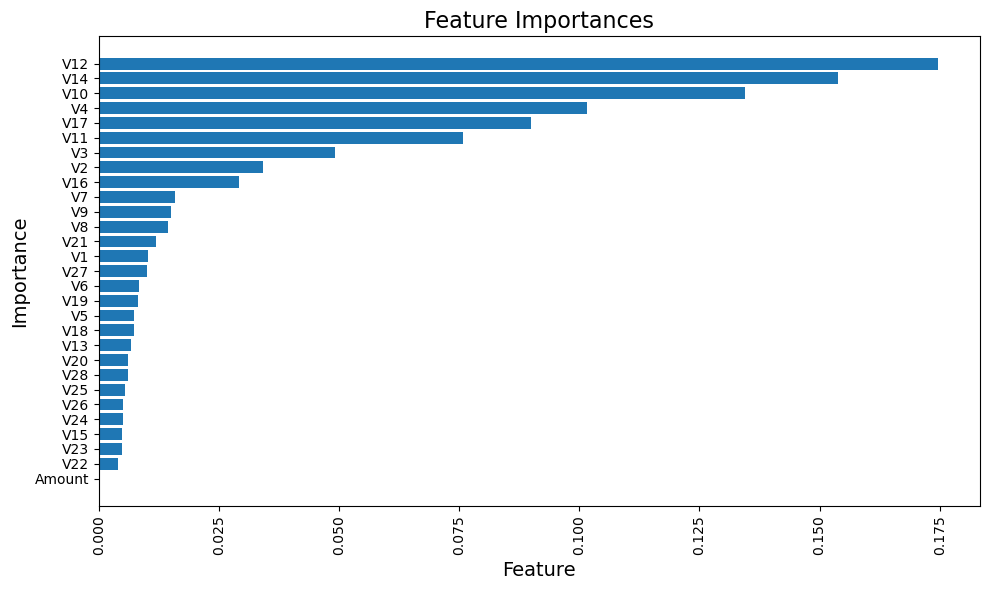

In [ ]:
import pandas as pd

# Calculate feature importances from the best Random Forest estimator
feature_importances = rf_best_estimator.feature_importances_

# Create a DataFrame with feature importances and feature names
df_feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance values in ascending order
df_feature_importances = df_feature_importances.sort_values(by='Importance', ascending=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importances['Feature'], df_feature_importances['Importance'])
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances', fontsize=16)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



## Evaluate the model on the transformed testing set

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions on the testing set
rf_test_preds = rf_best_estimator.predict(X_test_scaled)


# Performance metrics for Random Forest
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rf_test_preds))
print("Precision:", precision_score(y_test, rf_test_preds))
print("Recall:", recall_score(y_test, rf_test_preds))
print("F1 Score:", f1_score(y_test, rf_test_preds))
print("ROC AUC Score:", roc_auc_score(y_test, rf_best_estimator.predict_proba(X_test_scaled)[:,1]))
print()

Random Forest Performance:
Accuracy: 0.9998505179114714
Precision: 0.9997011251758087
Recall: 1.0
F1 Score: 0.9998505402530264
ROC AUC Score: 0.9999813713163622



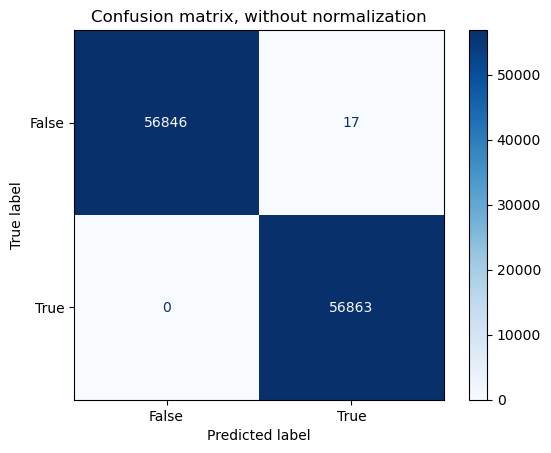

In [ ]:
#visualize classification results with confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
with plt.style.context("default"): #temporarily set the plot style
    disp = ConfusionMatrixDisplay.from_estimator(
        rf_best_estimator,
        X_test_scaled,
        y_test,
        display_labels=[False, True],
        cmap=plt.cm.Blues,
        normalize=None,
    )
    disp.ax_.set_title("Confusion matrix, without normalization")

## To improve overfitting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

best_score = 0  # Initialize the best score to monitor model improvement
patience = 5  # Number of epochs to wait for improvement before stopping
no_improvement_count = 0  # Counter for tracking epochs with no improvement
for epoch in range(100):  # Maximum number of epochs
    # Train the model with partial data
    rf_model.fit(X_train_scaled, y_train)

    # Evaluate model on validation set
    y_test_pred = rf_model.predict(X_test_scaled)
    val_score = accuracy_score(y_test, y_test_pred)

    # Check for improvement
    if val_score > best_score:
        best_score = val_score
        no_improvement_count = 0
        best_model = rf_model  # Save the best model so far
    else:
        no_improvement_count += 1

    # Stop training if there's no improvement for a certain number of epochs
    if no_improvement_count >= patience:
        print(f"Early stopping after epoch {epoch}")
        break

# Use the best model for inference
y_test_pred = best_model.predict(X_test_scaled)

Early stopping after epoch 5
